<a href="https://www.kaggle.com/code/mahendra77/software-defects-prediction?scriptVersionId=146449613" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/playground-series-s3e23/sample_submission.csv
/kaggle/input/playground-series-s3e23/train.csv
/kaggle/input/playground-series-s3e23/test.csv


In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

## About Data

In [3]:
# load data

train_data=pd.read_csv('/kaggle/input/playground-series-s3e23/train.csv')
test_data=pd.read_csv('/kaggle/input/playground-series-s3e23/test.csv')
submission=pd.read_csv('/kaggle/input/playground-series-s3e23/sample_submission.csv')

data=train_data.copy()

In [4]:
## top 5 rows

data.head()

,id,loc,v(g),ev(g),iv(g),n,v,l,d,i,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,0,22.0,3.0,1.0,2.0,60.0,278.63,0.06,19.56,14.25,...,17,1,1,0,16.0,9.0,38.0,22.0,5.0,False
1,1,14.0,2.0,1.0,2.0,32.0,151.27,0.14,7.00,21.11,...,11,0,1,0,11.0,11.0,18.0,14.0,3.0,False
2,2,11.0,2.0,1.0,2.0,45.0,197.65,0.11,8.05,22.76,...,8,0,1,0,12.0,11.0,28.0,17.0,3.0,False
3,3,8.0,1.0,1.0,1.0,23.0,94.01,0.19,5.25,17.86,...,4,0,2,0,8.0,6.0,16.0,7.0,1.0,True
4,4,11.0,2.0,1.0,2.0,17.0,60.94,0.18,5.63,12.44,...,7,0,2,0,7.0,6.0,10.0,10.0,3.0,False


In [5]:
## bottom 5 rows

data.tail()

,id,loc,v(g),ev(g),iv(g),n,v,l,d,i,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
101758,101758,10.0,2.0,1.0,1.0,28.0,122.98,0.15,6.60,18.63,...,7,0,1,0,11.0,8.0,16.0,12.0,3.0,False
101759,101759,27.0,5.0,4.0,1.0,107.0,559.93,0.06,18.00,34.17,...,23,0,2,0,18.0,20.0,67.0,40.0,9.0,False
101760,101760,26.0,1.0,1.0,1.0,83.0,360.17,0.04,22.75,12.56,...,20,0,4,0,10.0,8.0,51.0,28.0,1.0,False
101761,101761,10.0,2.0,1.0,2.0,43.0,191.76,0.15,6.46,29.53,...,7,0,1,0,11.0,14.0,24.0,19.0,3.0,False
101762,101762,136.0,18.0,18.0,1.0,296.0,1704.57,0.02,44.82,44.08,...,102,1,11,0,22.0,31.0,162.0,135.0,35.0,False


In [6]:
## info about columns

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101763 entries, 0 to 101762
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 101763 non-null  int64  
 1   loc                101763 non-null  float64
 2   v(g)               101763 non-null  float64
 3   ev(g)              101763 non-null  float64
 4   iv(g)              101763 non-null  float64
 5   n                  101763 non-null  float64
 6   v                  101763 non-null  float64
 7   l                  101763 non-null  float64
 8   d                  101763 non-null  float64
 9   i                  101763 non-null  float64
 10  e                  101763 non-null  float64
 11  b                  101763 non-null  float64
 12  t                  101763 non-null  float64
 13  lOCode             101763 non-null  int64  
 14  lOComment          101763 non-null  int64  
 15  lOBlank            101763 non-null  int64  
 16  lo

* loc: numeric - McCabe's line count of code
* v(g): numeric - McCabe "cyclomatic complexity"
* ev(g): numeric - McCabe "essential complexity"
* iv(g): numeric - McCabe "design complexity"
* n: numeric - Halstead total operators + operands
* v: numeric - Halstead "volume"
* l: numeric - Halstead "program length"
* d: numeric - Halstead "difficulty"
* i: numeric - Halstead "intelligence"
* e: numeric - Halstead "effort"
* b: numeric - Halstead
* t: numeric - Halstead's time estimator
* lOCode: numeric - Halstead's line count
* lOComment: numeric - Halstead's count of lines of comments
* lOBlank: numeric - Halstead's count of blank lines
* lOCodeAndComment: numeric
* uniq_Op: numeric - unique operators
* uniq_Opnd: numeric - unique operands
* total_Op: numeric - total operators
* total_Opnd: numeric - total operands
* branchCount: numeric - percentage of the flow graph
* defects: {false, true} - module has/has not one or more reported defects

In [7]:
## shape 

data.shape

(101763, 23)

In [8]:
## duplicated Data

data.duplicated().sum()

0

In [9]:
## descriptive statistics

data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,101763.0,50881.000000,29376.592059,0.0,25440.50,50881.00,76321.50,101762.00
loc,101763.0,37.347160,54.600401,1.0,13.00,22.00,42.00,3442.00
v(g),101763.0,5.492684,7.900855,1.0,2.00,3.00,6.00,404.00
ev(g),101763.0,2.845022,4.631262,1.0,1.00,1.00,3.00,165.00
iv(g),101763.0,3.498826,5.534541,1.0,1.00,2.00,4.00,402.00
n,101763.0,96.655995,171.147191,0.0,25.00,51.00,111.00,8441.00
v,101763.0,538.280956,1270.791601,0.0,97.67,232.79,560.25,80843.08
l,101763.0,0.111634,0.100096,0.0,0.05,0.09,0.15,1.00
d,101763.0,13.681881,14.121306,0.0,5.60,9.82,18.00,418.20
i,101763.0,27.573007,22.856742,0.0,15.56,23.36,34.34,569.78


## EDA

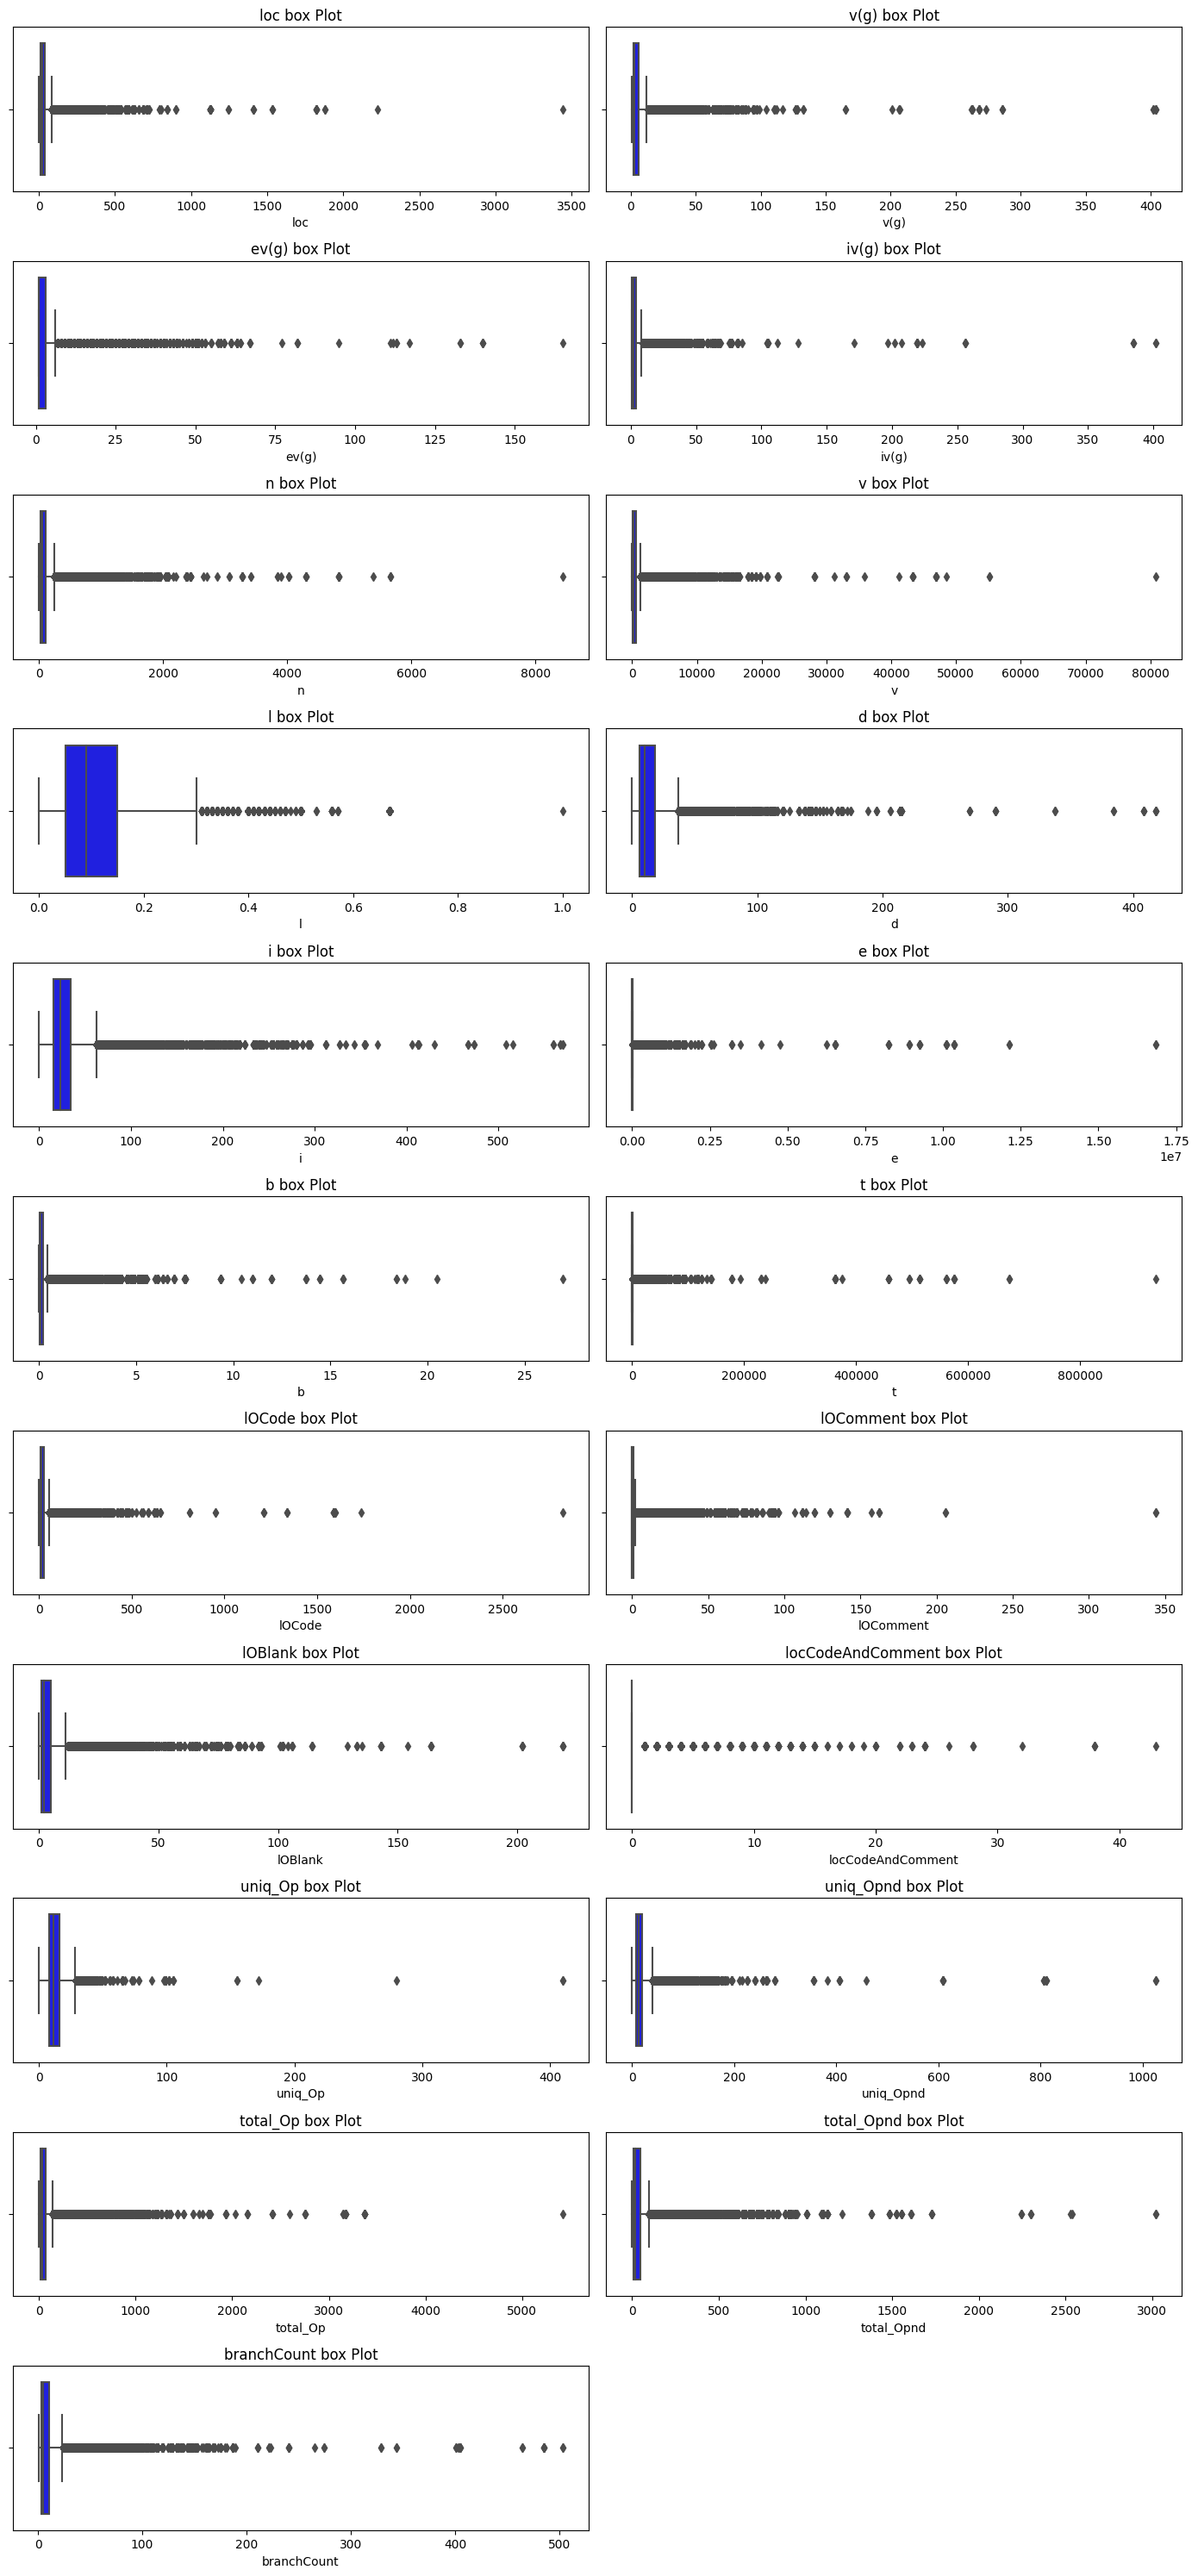

In [10]:
## check for outliers

def box(x):
    sns.boxplot(x=x,data=data,color='blue')
    
plt.figure(figsize=(14,30))
for idx,column in enumerate(data.columns[1:22]): 
    plt.subplot(11,2,idx+1)
    box(column)
    plt.title(f"{column} box Plot")
    plt.tight_layout()

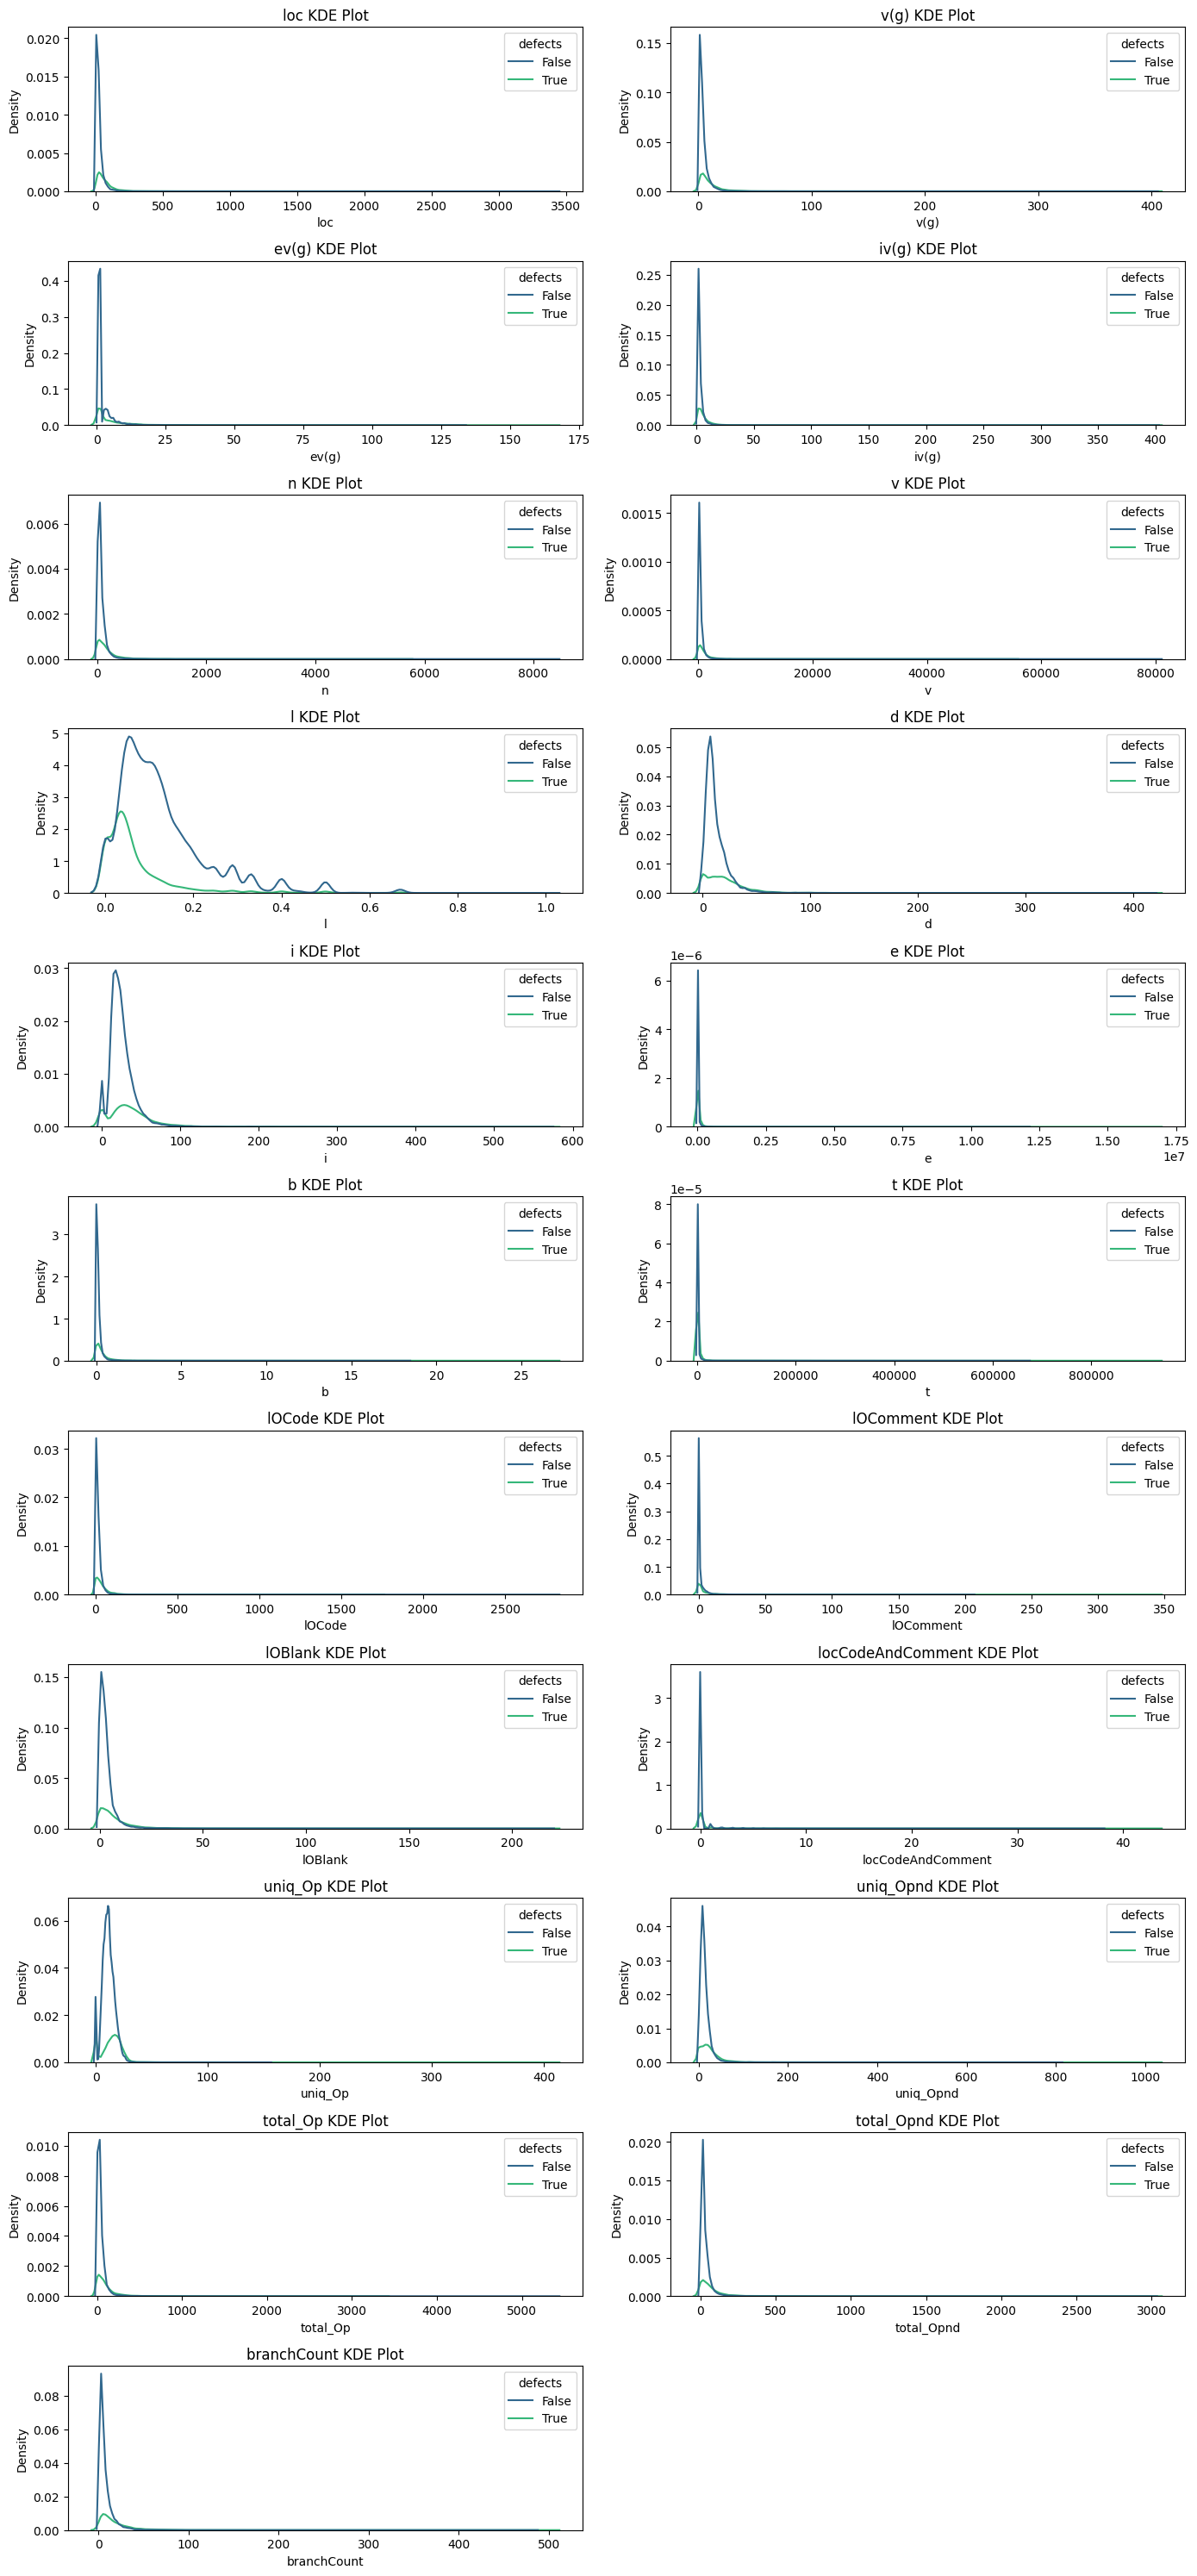

In [11]:
## check for distribution of varaibles

def kde(x):
    sns.kdeplot(x=x,data=data,hue='defects',palette='viridis')
    
plt.figure(figsize=(14,30))
for idx,column in enumerate(data.columns[1:22]): 
    plt.subplot(11,2,idx+1)
    kde(column)
    plt.title(f"{column} KDE Plot")
    plt.tight_layout()

<Axes: >

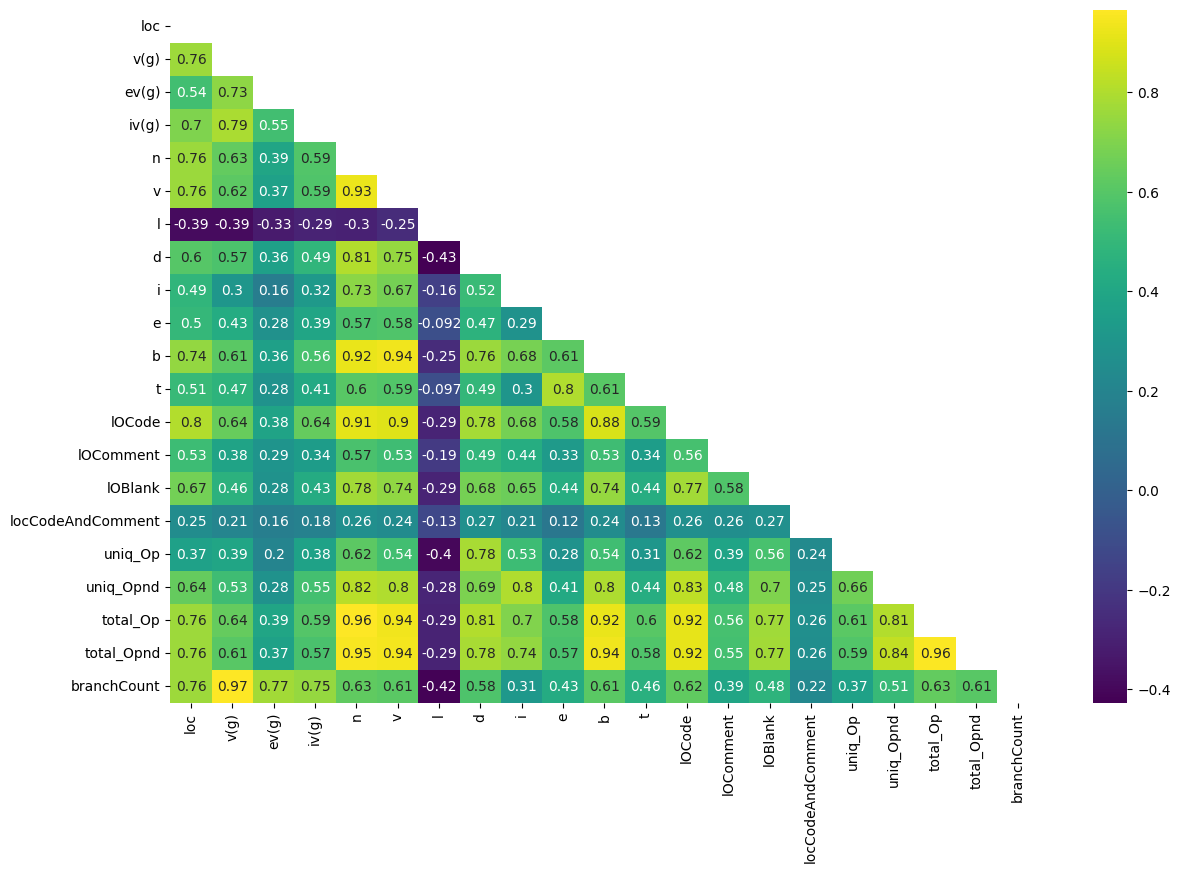

In [12]:
## correlation of attributes among each other 

corr = data.iloc[:,1:22].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(14, 9))
sns.heatmap(corr, mask=mask,annot=True,cmap='viridis')

<Axes: xlabel='defects', ylabel='count'>

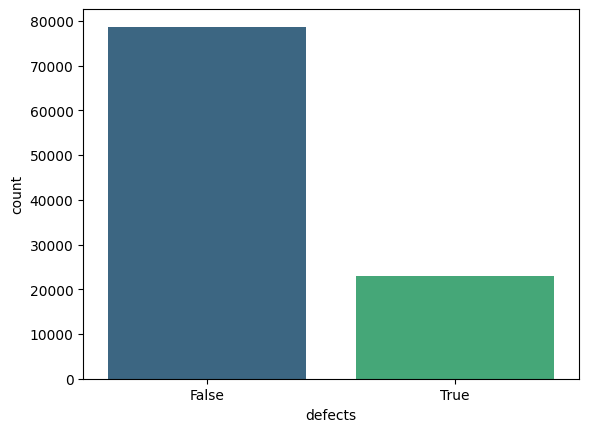

In [13]:
## how many true or false

sns.countplot(x='defects',data=data,palette='viridis')

In [14]:
## check for missing values
data.isnull().sum()

id                   0
loc                  0
v(g)                 0
ev(g)                0
iv(g)                0
n                    0
v                    0
l                    0
d                    0
i                    0
e                    0
b                    0
t                    0
lOCode               0
lOComment            0
lOBlank              0
locCodeAndComment    0
uniq_Op              0
uniq_Opnd            0
total_Op             0
total_Opnd           0
branchCount          0
defects              0
dtype: int64

**KEY TakeOvers:**
1. loc is one of the key attribute which had strong positive correlation among aother attributes.
2. No Missing Values.
3. Data is highly skewed ---> Do Log transformations --> Standardization(if needed).
4. (b,n,v) these three attributes are eqaully correlated among other attributes. (highly corelated among each other).
5. (branchcount,v(g) these two attributes are eqaully correlated among other attributes.(highly corelated among each other).
6. (totalOp,totalOpnd) these two attributes are eqaully correlated among other attributes.(highly corelated among each other).
7. Defects as taget variable as binary classification problem.
8. Defects(True:False) are in 1:3 ratio --> when creating train and test split maintain same proportion of samples randomly.


## Feature Engineering

In [15]:
def log_transform(data):
    for column in data.columns[1:22]:
        data[column] = data[column].apply(lambda x: np.log(x) if x > 0 else 0)
log_transform(data)

In [16]:
## try these with different functions like max,min,mean,sum

def new_features(data):
    data['new_bnv']= round((data['b']+data['n']+data['v'])/3,2)
    data['new_branch_v(g)']=round((data['branchCount']+data['v'])/2,2)
    data['new_OpOPnd']=round((data['total_Opnd']+data['total_Op'])/2,2)
new_features(data)

In [17]:
data['defects']=data['defects'].map({False:0,True:1})

In [18]:
numeric_=['loc', 'ev(g)', 'iv(g)', 'l', 'd', 'i', 'e','t', 'lOCode', 'lOComment', 'lOBlank', 'locCodeAndComment',
       'uniq_Op', 'uniq_Opnd', 'new_bnv', 'new_branch_v(g)', 'new_OpOPnd']
target='defects'

#### Train and Test Split

In [19]:
## test and train generate
def train_test_generate(data):
    false_=data[data['defects']==0]
    true_=data[data['defects']==1]
    
    mask = np.random.rand(len(false_)) < 0.75
    train_set_false= false_[mask]
    test_set_false = false_[~mask] 
    
    mask = np.random.rand(len(true_)) < 0.75
    train_set_true= true_[mask]
    test_set_true = true_[~mask] 
    
    return ((pd.concat([train_set_false,train_set_true]),pd.concat([test_set_false,test_set_true])))

train,test=train_test_generate(data)

#### Standardization

In [20]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train_scaled=sc.fit_transform(train[numeric_])
x_test_scaled=sc.transform(test[numeric_])
y_train=train['defects']
y_test=test['defects']

## Model Tuning

#### LGBM

In [21]:
from lightgbm import LGBMClassifier
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn.ensemble import VotingClassifier,StackingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier

## optimal parameters
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

## metrics
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,confusion_matrix,roc_auc_score

### LGBM 

In [22]:
seed = np.random.seed(0)
params= {   'boosting_type':['gbdt','rf','dart'],
            "n_estimators" : [int(x) for x in np.linspace(200,2000)],
            "max_depth" : [i for i in range(2,11)],
            "min_child_weight" : [i for i in range(1,6)],
            "learning_rate" : [round(i,2) for i in np.linspace(0.1,2,20)],                  
            'reg_alpha': [round(i,2) for i in np.linspace(0.1,1,20)] ,
            'reg_lambda':[round(i,2) for i in np.linspace(0.1,2,20)],
            'num_iterations': [i for i in range(100,1001,100)]
        }
lgbm=LGBMClassifier( objective = 'binary', metric ='auc',random_state=seed,verbose=-1)
lgbm_cv=RandomizedSearchCV(estimator=lgbm,param_distributions=params)
lgbm_cv.fit(x_train_scaled,y_train)

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /usr/local/src/LightGBM/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /usr/local/src/LightGBM/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /usr/local/src/LightGBM/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /usr/local/src/LightGBM/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /usr/local/src/LightGBM/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && conf

RandomizedSearchCV(estimator=LGBMClassifier(metric='auc', objective='binary',
                                            verbose=-1),
                   param_distributions={'boosting_type': ['gbdt', 'rf', 'dart'],
                                        'learning_rate': [0.1, 0.2, 0.3, 0.4,
                                                          0.5, 0.6, 0.7, 0.8,
                                                          0.9, 1.0, 1.1, 1.2,
                                                          1.3, 1.4, 1.5, 1.6,
                                                          1.7, 1.8, 1.9, 2.0],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10],
                                        'min_child_weight': [1, 2, 3, 4, 5],
                                        'n_estimators': [200, 236, 273, 310,
                                                         346, 383, 42...
                                                         640, 677, 714, 751,
                                                         787, 824, 861, 897,
                                                         934, 971, 1008, 1044,
                                                         1081, 1118, 1155, 1191,
                                                         1228, 1265, ...],
                                        'num_iterations': [100, 200, 300, 400,
                                                           500, 600, 700, 800,
                                                           900, 1000],
                                        'reg_alpha': [0.1, 0.15, 0.19, 0.24,
                                                      0.29, 0.34, 0.38, 0.43,
                                                      0.48, 0.53, 0.57, 0.62,
                                                      0.67, 0.72, 0.76, 0.81,
                                                      0.86, 0.91, 0.95, 1.0],
                                        'reg_lambda': [0.1, 0.2, 0.3, 0.4, 0.5,
                                                       0.6, 0.7, 0.8, 0.9, 1.0,
                                                       1.1, 1.2, 1.3, 1.4, 1.5,
                                                       1.6, 1.7, 1.8, 1.9,
                                                       2.0]})

In [23]:
best_params_lgbm_rscv = lgbm_cv.best_params_
best_lgbm_cv = lgbm_cv.best_estimator_

y_pred=best_lgbm_cv.predict(x_test_scaled)

print("LGBM model-- Randomized Search")

print(" - ROC Area Under Curve :",roc_auc_score(np.array(y_test),best_lgbm_cv.predict_proba(x_test_scaled)[:,1]))

print("\n - Classification Report :\n",classification_report(y_test, y_pred))

LGBM model-- Randomized Search
 - ROC Area Under Curve : 0.7917782162872138

 - Classification Report :
               precision    recall  f1-score   support

           0       0.84      0.94      0.89     19791
           1       0.65      0.37      0.47      5727

    accuracy                           0.81     25518
   macro avg       0.75      0.66      0.68     25518
weighted avg       0.80      0.81      0.79     25518



In [24]:
best_params_lgbm_rscv 

{'reg_lambda': 1.6,
 'reg_alpha': 0.34,
 'num_iterations': 400,
 'n_estimators': 1706,
 'min_child_weight': 2,
 'max_depth': 2,
 'learning_rate': 1.0,
 'boosting_type': 'dart'}

#### XGB

#### Randomized Search CV

In [25]:
params = {
    "n_estimators" : [int(x) for x in np.linspace(200,2000)],
    "max_depth" : [i for i in range(2,11)],
    "min_child_weight" : [i for i in range(1,6)],
    "max_delta_step" : [i for i in range(1,6)],
    "learning_rate" : [round(i,2) for i in np.linspace(0.1,2,20)],
    "gamma" : [round(i,2) for i in np.linspace(0,5,11)],
    "subsample" : [round(i,2) for i in np.linspace(0.1,1,10)],
}

xg= xgb.XGBClassifier(objective='binary:logistic', tree_method='hist', colsample_bytree=0.7)

xg_cv=RandomizedSearchCV(estimator=xg,param_distributions=params)
xg_cv.fit(x_train_scaled,y_train)

RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=0.7,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,...
                                                          0.5, 0.6, 0.7, 0.8,
                                                          0.9, 1.0, 1.1, 1.2,
                                                          1.3, 1.4, 1.5, 1.6,
                                                          1.7, 1.8, 1.9, 2.0],
                                        'max_delta_step': [1, 2, 3, 4, 5],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10],
                                        'min_child_weight': [1, 2, 3, 4, 5],
                                        'n_estimators': [200, 236, 273, 310,
                                                         346, 383, 420, 457,
                                                         493, 530, 567, 604,
                                                         640, 677, 714, 751,
                                                         787, 824, 861, 897,
                                                         934, 971, 1008, 1044,
                                                         1081, 1118, 1155, 1191,
                                                         1228, 1265, ...],
                                        'subsample': [0.1, 0.2, 0.3, 0.4, 0.5,
                                                      0.6, 0.7, 0.8, 0.9,
                                                      1.0]})

In [26]:
best_params_xg_rscv = xg_cv.best_params_
best_xg_cv = xg_cv.best_estimator_

y_pred=best_lgbm_cv.predict(x_test_scaled)

print("LGBM model-- Randomized Search")

print(" - ROC Area Under Curve :",roc_auc_score(np.array(y_test),best_xg_cv.predict_proba(x_test_scaled)[:,1]))

print("\n - Classification Report :\n",classification_report(y_test, y_pred))

LGBM model-- Randomized Search
 - ROC Area Under Curve : 0.7865474547770491

 - Classification Report :
               precision    recall  f1-score   support

           0       0.84      0.94      0.89     19791
           1       0.65      0.37      0.47      5727

    accuracy                           0.81     25518
   macro avg       0.75      0.66      0.68     25518
weighted avg       0.80      0.81      0.79     25518



In [27]:
best_params_xg_rscv

{'subsample': 0.7,
 'n_estimators': 640,
 'min_child_weight': 4,
 'max_depth': 2,
 'max_delta_step': 1,
 'learning_rate': 0.5,
 'gamma': 0.5}

#### Cat Boost

In [28]:
params= {
    'learning_rate': [round(i,2) for i in np.linspace(0.1,2,20)],
    'max_depth': [i for i in range(2,11)],
    'l2_leaf_reg': [1, 3, 5,],
    'iterations': [int(x) for x in np.linspace(200,2000)],
    'min_data_in_leaf' : [i for i in range(10,30)],
    'max_bin': [i for i in range(100,300,20)]
}

cat=CatBoostClassifier(        objective='Logloss',
                               loss_function='Logloss',
                               eval_metric='AUC',
                               bagging_temperature=0.20,
                               colsample_bylevel=0.75,
                               random_strength=0.70,verbose=0)

cat_cv=RandomizedSearchCV(estimator=cat,param_distributions=params)
cat_cv.fit(x_train_scaled,y_train)

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
Training has stopped (degenerate solution on iteration 1048, probably too small l2-regularization, try to increase it)
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greate

RandomizedSearchCV(estimator=<catboost.core.CatBoostClassifier object at 0x7a7d5e011330>,
                   param_distributions={'iterations': [200, 236, 273, 310, 346,
                                                       383, 420, 457, 493, 530,
                                                       567, 604, 640, 677, 714,
                                                       751, 787, 824, 861, 897,
                                                       934, 971, 1008, 1044,
                                                       1081, 1118, 1155, 1191,
                                                       1228, 1265, ...],
                                        'l2_leaf_reg': [1, 3, 5],
                                        'learning_rate': [0.1, 0.2, 0.3, 0.4,
                                                          0.5, 0.6, 0.7, 0.8,
                                                          0.9, 1.0, 1.1, 1.2,
                                                          1.3, 1.4, 1.5, 1.6,
                                                          1.7, 1.8, 1.9, 2.0],
                                        'max_bin': [100, 120, 140, 160, 180,
                                                    200, 220, 240, 260, 280],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10],
                                        'min_data_in_leaf': [10, 11, 12, 13, 14,
                                                             15, 16, 17, 18, 19,
                                                             20, 21, 22, 23, 24,
                                                             25, 26, 27, 28,
                                                             29]})

In [29]:
best_params_cat_rscv = cat_cv.best_params_
best_cat_cv = cat_cv.best_estimator_

y_pred=best_cat_cv.predict(x_test_scaled)

print("LGBM model-- Randomized Search")

print(" - ROC Area Under Curve :",roc_auc_score(np.array(y_test),best_cat_cv.predict_proba(x_test_scaled)[:,1]))

print("\n - Classification Report :\n",classification_report(y_test, y_pred))

LGBM model-- Randomized Search
 - ROC Area Under Curve : 0.7589917616215345

 - Classification Report :
               precision    recall  f1-score   support

           0       0.84      0.93      0.88     19791
           1       0.60      0.37      0.46      5727

    accuracy                           0.80     25518
   macro avg       0.72      0.65      0.67     25518
weighted avg       0.78      0.80      0.78     25518



### Voting Classifier

In [30]:
voting = VotingClassifier(estimators=[('cat',best_cat_cv),('xgb',best_xg_cv),('lgbm',best_lgbm_cv)],voting='hard')

voting.fit(x_train_scaled,y_train)


VotingClassifier(estimators=[('cat',
                              <catboost.core.CatBoostClassifier object at 0x7a7d5d7cfdf0>),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.7,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=0.5,
                                            gpu_id=None, grow_policy=Non...
                                            max_leaves=None, min_child_weight=4,
                                            missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=640, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=None, ...)),
                             ('lgbm',
                              LGBMClassifier(boosting_type='dart',
                                             learning_rate=1.0, max_depth=2,
                                             metric='auc', min_child_weight=2,
                                             n_estimators=1706,
                                             num_iterations=400,
                                             objective='binary', reg_alpha=0.34,
                                             reg_lambda=1.6, verbose=-1))])

              precision    recall  f1-score   support

           0       0.84      0.94      0.89     19791
           1       0.65      0.38      0.48      5727

    accuracy                           0.81     25518
   macro avg       0.74      0.66      0.68     25518
weighted avg       0.80      0.81      0.79     25518



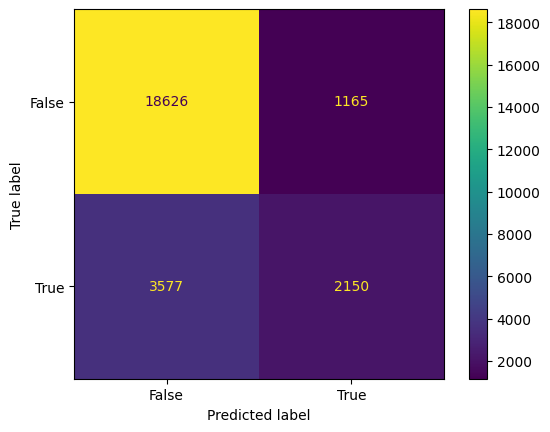

In [31]:
y_pred=voting.predict(x_test_scaled)
print(classification_report(y_test,y_pred))

ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred),display_labels=['False','True']).plot()

In [32]:
stack = StackingClassifier(estimators=[('cat',best_cat_cv),('xgb',best_xg_cv),('lgbm',best_lgbm_cv)],final_estimator=HistGradientBoostingClassifier())

stack.fit(x_train_scaled,y_train)

StackingClassifier(estimators=[('cat',
                                <catboost.core.CatBoostClassifier object at 0x7a7d5d7cfdf0>),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=0.7,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=0.5,
                                              gpu_id=None, grow_policy=N...
                                              monotone_constraints=None,
                                              n_estimators=640, n_jobs=None,
                                              num_parallel_tree=None,
                                              predictor=None, random_state=None, ...)),
                               ('lgbm',
                                LGBMClassifier(boosting_type='dart',
                                               learning_rate=1.0, max_depth=2,
                                               metric='auc', min_child_weight=2,
                                               n_estimators=1706,
                                               num_iterations=400,
                                               objective='binary',
                                               reg_alpha=0.34, reg_lambda=1.6,
                                               verbose=-1))],
                   final_estimator=HistGradientBoostingClassifier())

              precision    recall  f1-score   support

           0       0.84      0.94      0.89     19791
           1       0.65      0.38      0.48      5727

    accuracy                           0.82     25518
   macro avg       0.75      0.66      0.68     25518
weighted avg       0.80      0.82      0.80     25518



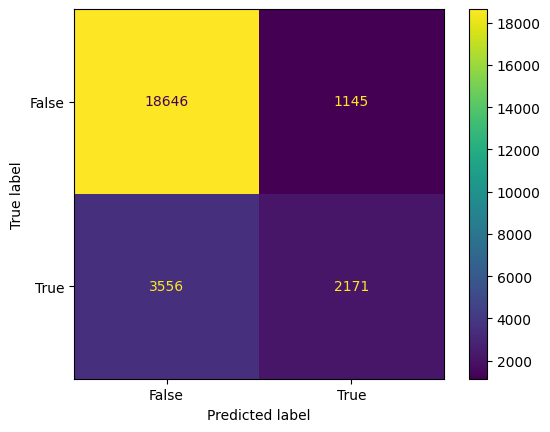

In [33]:
y_pred=stack.predict(x_test_scaled)
print(classification_report(y_test,y_pred))

ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred),display_labels=['False','True']).plot()